# 멜로디 구분 테스트
임의의 노래 파일을 불러와 단조/장조인지 구분하는 테스트

### 1. 경로 설정

In [1]:
import os
#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())

c:\Jihyun\making_music


In [80]:
#원하는 위치로 변경해주기/차후 위치 오류 방지 위함
os.chdir("/content/drive/Shareddrives/2023 1학기 인공지능/")
print(os.getcwd())

/content/drive/Shareddrives/2023 1학기 인공지능


### 2. 설치

In [ ]:
!apt install ffmpeg
!pip install spleeter
!pip install pydub
!pip install python-vlc
from IPython.display import Audio

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import wavfile
from glob import glob
from tqdm import tqdm
import librosa.display, librosa

In [56]:
from spleeter.separator import Separator
from spleeter.audio.adapter import AudioAdapter
import numpy as np

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
import torch
import torchaudio
import IPython
from scipy import signal
from scipy.io.wavfile import read as read_wav
import torch.nn as nn
from scipy import fft,signal
from sklearn.preprocessing import minmax_scale

### 3. 불러오기 & 분리하기

In [60]:
# 정상적으로 load되었는지 확인
sample_data = "/content/drive/Shareddrives/2023 1학기 인공지능/data/withDog.mp3"
Audio(sample_data)

Output hidden; open in https://colab.research.google.com to view.

In [115]:
sad_data = "/content/drive/Shareddrives/2023 1학기 인공지능/data/sad.mp3"
Audio(sad_data)

Output hidden; open in https://colab.research.google.com to view.

In [96]:
# 4개로 분리
# vocal,drums,bass,etc 로 분리됨
# -o : 저장될 경로 (현재 경로 + 폴더 이름) -p : 분리 개수 및 분리시 Hz 설정 / separate 필수 인자 : 파일 이름
!spleeter separate -o output_test -p spleeter:4stems-16kHz data/withDog.mp3

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/4stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 4stems archive
INFO:spleeter:4stems model file(s) extracted
INFO:spleeter:File output_test/withDog/vocals.wav written succesfully
INFO:spleeter:File output_test/withDog/drums.wav written succesfully
INFO:spleeter:File output_test/withDog/bass.wav written succesfully
INFO:spleeter:File output_test/withDog/other.wav written succesfully


In [117]:
!spleeter separate -o output_test2 -p spleeter:4stems-16kHz data/sad.mp3

INFO:spleeter:File output_test2/sad/vocals.wav written succesfully
INFO:spleeter:File output_test2/sad/drums.wav written succesfully
INFO:spleeter:File output_test2/sad/bass.wav written succesfully
INFO:spleeter:File output_test2/sad/other.wav written succesfully


### 4. 시각화 하기(분석1)

In [97]:
sns.set_style('darkgrid')

In [98]:
sig_bass, sr_bass = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test/withDog/bass.wav')
sig_drums, sr_drums = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test/withDog/drums.wav')
sig_other, sr_other = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test/withDog/other.wav')
sig_vocals, sr_vocals = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test/withDog/vocals.wav')

Text(0.5, 1.0, 'Bass')

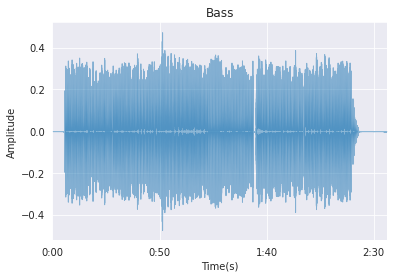

In [99]:
plt.figure()
librosa.display.waveplot(sig_bass,sr_bass,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Bass')

Text(0.5, 1.0, 'Drums')

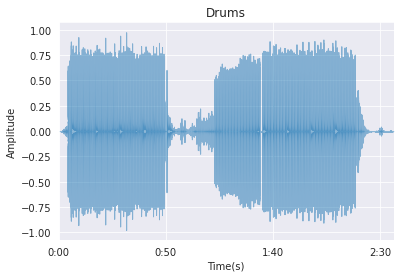

In [100]:
plt.figure()
librosa.display.waveplot(sig_drums,sr_drums,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Drums')

Text(0.5, 1.0, 'Other')

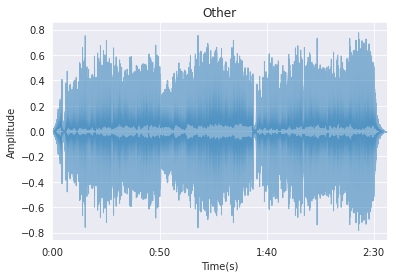

In [101]:
plt.figure()
librosa.display.waveplot(sig_other,sr_other,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Other')

Text(0.5, 1.0, 'Vocals')

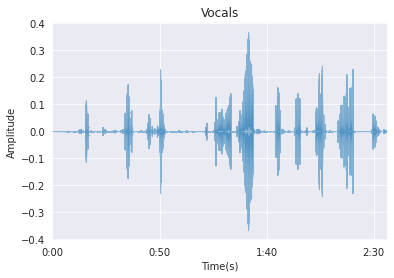

In [102]:
plt.figure()
librosa.display.waveplot(sig_vocals,sr_vocals,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Vocals')

other이 멜로디 역할을 하고 있음을 알 수 있음    
Drums -> 멜로디가 섞임  
Base -> 잘 안나옴  
Vocals -> 쇠소리가 남/안걸러진다

In [118]:
sig_bass2, sr_bass2 = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test2/sad/bass.wav')
sig_drums2, sr_drums2 = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test2/sad/drums.wav')
sig_other2, sr_other2 = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test2/sad/other.wav')
sig_vocals2, sr_vocals2 = librosa.load('/content/drive/Shareddrives/2023 1학기 인공지능/output_test2/sad/vocals.wav')

Text(0.5, 1.0, 'Vocals')

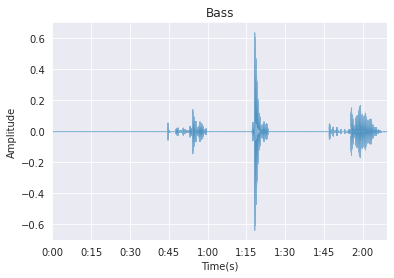

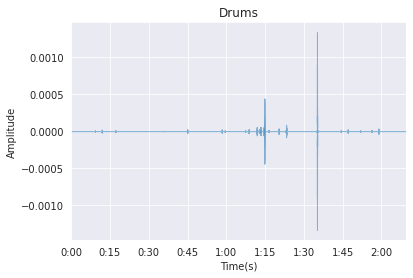

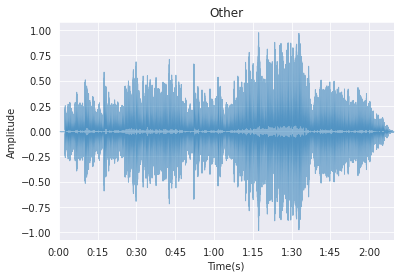

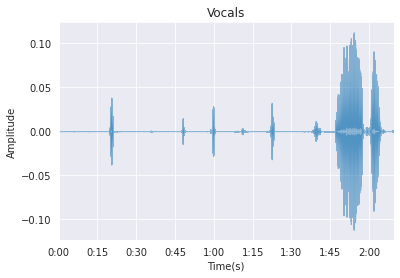

In [119]:
plt.figure()
librosa.display.waveplot(sig_bass2,sr_bass2,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Bass')

plt.figure()
librosa.display.waveplot(sig_drums2,sr_drums2,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Drums')

plt.figure()
librosa.display.waveplot(sig_other2,sr_other2,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Other')

plt.figure()
librosa.display.waveplot(sig_vocals2,sr_vocals2,alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Vocals')

### 5. 장조 단조 구분하기

In [121]:
melody = '/content/drive/Shareddrives/2023 1학기 인공지능/output_test/withDog/other.wav'
melody2 = '/content/drive/Shareddrives/2023 1학기 인공지능/output_test2/sad/other.wav'

In [107]:
TONE_A = 440 # Hz 주파수에서 첫번째 A
NOTES = ['A','A#','B','C','C#','D','D#','E','F','F#','G','G#',] # 음계

In [108]:
def plot_freq_file(fileName,FREQ_FROM = TONE_A*2**-2,FREQ_TO=TONE_A*2**4):
  rate,data_raw=read_wav(fileName)
  data = (data_raw[:,0]+data_raw[:,1]).astype(np.float32)
  data = minmax_scale(data,(-1.,1.)) # float로 scaling
  
  freq_image = fft.rfft(data,norm='forward')
  freq_scale = fft.rfftfreq(len(data),1./rate)

  f_idx = np.where((freq_scale>FREQ_FROM)&(freq_scale<FREQ_TO)) 
    
  fig, ax = plt.subplots(1, 1)
  ax.set_xscale('log',base=2.) # log scale base 2 of freq-> tone change in one octave is freq multiplication by 2 
  plt.plot(freq_scale[f_idx],np.abs(freq_image[f_idx]))
  plt.title('sound signal freq image')
  plt.xlabel('freq, [Hz]')
  plt.xticks((110,220,440,880,1760,3520),('110','220','440','880','1760','3520'))
  plt.ylabel('mode magnitude')

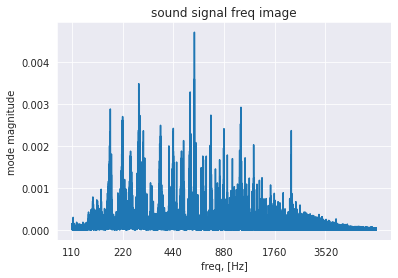

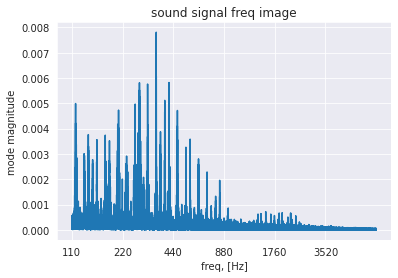

In [122]:
plot_freq_file(melody)
plot_freq_file(melody2)

In [110]:
def freq_to_rnote(freq):
    r = 12.0*np.log2(freq/TONE_A)
    return r

def rnote_to_freq(r):
    f = TONE_A*2**(r/12)
    return f

def get_note_volume(rnote,fft_image,fft_freq,rnote_epsilon=0.2):
    """ rnote - name or number of note,fft_image - fourier image of signal,
    fft_freq - frequencies in fft_image,rnote_epsilon - halfwide of window to inspect
    return maximum volume(magnitude) of signal in freq window for rnote """
    if isinstance(rnote,str): # supply of notes letter notation
        rnote = NOTES.index(rnote)
    try:
        f0 = rnote_to_freq(rnote-rnote_epsilon)
        f1 = rnote_to_freq(rnote+rnote_epsilon)
        f_idx = np.where((fft_freq>=f0)&(fft_freq<=f1)) 
        maxVol = np.max((fft_image[f_idx]))
    except Exception:
        return 0.
    
    return maxVol

def get_notes_volume(rnote,fft_image,fft_freq,rnote_epsilon=0.5,oct_range_from=-2.,oct_range_to=4.):
    if isinstance(rnote,str): # supply of notes letter notation
        rnote = NOTES.index(rnote)
    rnotes = np.arange(rnote+12.*oct_range_from,rnote+12.*oct_range_to,12.0)
    vol = []
    for rn in rnotes:
        vol.append(get_note_volume(rn,fft_image,fft_freq))
        
    return np.max(vol)
def plot_notes(fileName):
    """convert the fft image from file to notes notations and plot on"""
    #print(fileName)
    rate,data_raw = read_wav(fileName)
    data = (data_raw[:,0]+data_raw[:,1]).astype(np.float32) # stereo of any type -> mono of float32
    data = minmax_scale(data,(-1.,1.)) # float32 scaling 
    fft_image = np.abs(fft.rfft(data,norm='forward')) 
    fft_freq = fft.rfftfreq(len(data),1./rate)
    vol_matrix = np.ndarray(shape=(12),dtype=np.float32)
    for rnote in range(12):
        vol_matrix[rnote] = get_notes_volume(rnote,fft_image,fft_freq)
        
    plt.plot(vol_matrix)
    plt.xticks(ticks=(0,1,2,3,4,5,6,7,8,9,10,11),labels=NOTES)
    plt.show()

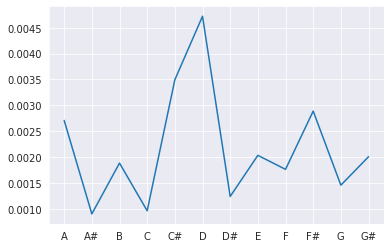

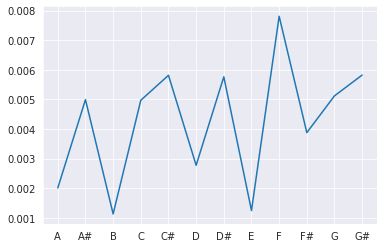

In [123]:
plot_notes(melody)
plot_notes(melody2)

In [124]:
def isMajor(fileName):
    #print(fileName)
    rate,data_raw = read_wav(fileName)
    data = (data_raw[:,0]+data_raw[:,1]).astype(np.float32) # stereo of any type -> mono of float32
    data = minmax_scale(data,(-1.,1.)) # float32 scaling 
    fft_image = np.abs(fft.rfft(data,norm='forward')) 
    fft_freq = fft.rfftfreq(len(data),1./rate)
    
    major_vol = []
    minor_vol = []
    for rnote in range(12):
        vol = get_notes_volume(rnote,fft_image,fft_freq)
        v3 = get_notes_volume((rnote+3)%12,fft_image,fft_freq)
        v4 = get_notes_volume((rnote+4)%12,fft_image,fft_freq)
        v7 = get_notes_volume((rnote+7)%12,fft_image,fft_freq)
        major_vol.append(vol+v4+v7)
        minor_vol.append(vol+v3+v7)
        
    major_max = max(major_vol)
    minor_max = max(minor_vol)
    #print('major '+str(major_max)+' minor '+str(minor_max))
    if major_max>minor_max:
        return 1
    return 0 

if isMajor(melody):
  print('첫 곡은 장조입니다')
else:
  print('첫 곡은 단조입니다')

if isMajor(melody2):
  print('두번째 곡은 장조입니다')
else:
  print('두번째 곡은 단조입니다')

첫 곡은 장조입니다
두번째 곡은 장조입니다
